# Libraryes and dataset

In [2]:
!pip install scipy==1.7.2

  Using cached scipy-1.7.2-cp38-cp38-macosx_10_9_x86_64.whl (33.0 MB)
  Attempting uninstall: scipy
    Found existing installation: scipy 1.7.0
    Uninstalling scipy-1.7.0:
      Successfully uninstalled scipy-1.7.0


In [3]:
import scipy
scipy.__version__

'1.7.2'

In [4]:
pip install -U scikit-learn

  Using cached scikit_learn-1.0.1-cp38-cp38-macosx_10_13_x86_64.whl (7.9 MB)
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.24.2
    Uninstalling scikit-learn-0.24.2:
      Successfully uninstalled scikit-learn-0.24.2
Note: you may need to restart the kernel to use updated packages.


In [5]:
import sklearn
sklearn.__version__

'1.0.1'

In [4]:
# Import the packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from textblob import TextBlob
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

from autosklearn.regression import AutoSklearnRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import confusion_matrix

In [5]:
dataset = pd.read_csv('Womens Clothing E-Commerce Reviews.csv')

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               23486 non-null  int64 
 1   Clothing ID              23486 non-null  int64 
 2   Age                      23486 non-null  int64 
 3   Title                    19676 non-null  object
 4   Review Text              22641 non-null  object
 5   Rating                   23486 non-null  int64 
 6   Recommended IND          23486 non-null  int64 
 7   Positive Feedback Count  23486 non-null  int64 
 8   Division Name            23472 non-null  object
 9   Department Name          23472 non-null  object
 10  Class Name               23472 non-null  object
dtypes: int64(6), object(5)
memory usage: 2.0+ MB


In [7]:
dataset.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


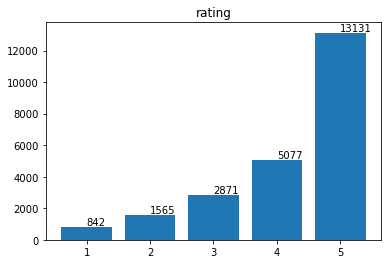

In [8]:
plt.bar(dataset['Rating'].value_counts().index, list(dataset['Rating'].value_counts()))
for index, value in enumerate(list(dataset['Rating'].value_counts().sort_values())):
    plt.text(index+1, value+100, str(value))
plt.title('rating')
plt.show()

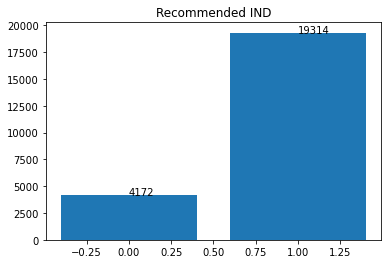

In [9]:
plt.bar(dataset['Recommended IND'].value_counts().index.astype(int), list(dataset['Recommended IND'].value_counts()))
for index, value in enumerate(list(dataset['Recommended IND'].value_counts().sort_values())):
    plt.text(index, value, str(value))
plt.title('Recommended IND')
plt.show()

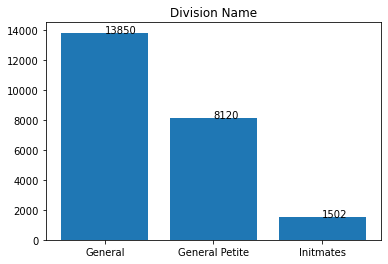

In [10]:
plt.bar(dataset['Division Name'].value_counts().index, list(dataset['Division Name'].value_counts()))
for index, value in enumerate(list(dataset['Division Name'].value_counts())):
    plt.text(index, value, str(value))
plt.title('Division Name')
plt.show()

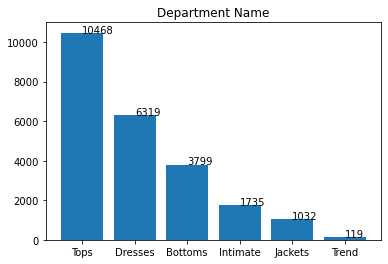

In [11]:
plt.bar(dataset['Department Name'].value_counts().index, list(dataset['Department Name'].value_counts()))
for index, value in enumerate(list(dataset['Department Name'].value_counts())):
    plt.text(index, value, str(value))
plt.title('Department Name')
plt.show()

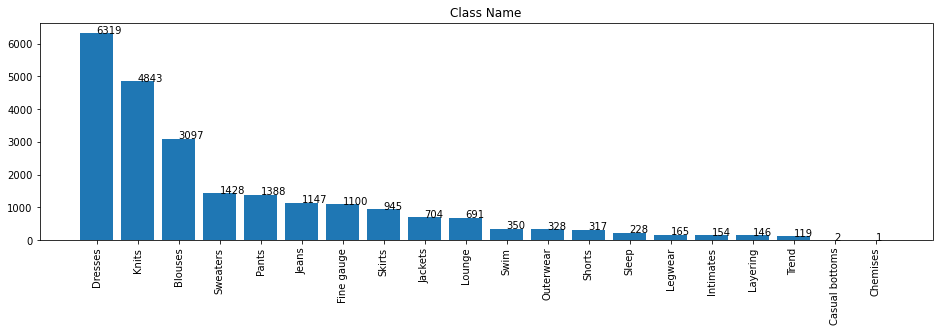

In [12]:
plt.figure(figsize=(16,4))
plt.bar(dataset['Class Name'].value_counts().index, list(dataset['Class Name'].value_counts()))
for index, value in enumerate(list(dataset['Class Name'].value_counts())):
    plt.text(index, value, str(value))
plt.title('Class Name')
plt.xticks(rotation=90)
plt.show()

# 1.Analyze the datasets

In [13]:
import re
import nltk

In [14]:
from sklearn.feature_extraction.text import CountVectorizer, ENGLISH_STOP_WORDS

In [15]:
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize, sent_tokenize


# Filter rows with column
data = dataset.loc[dataset['Review Text'].notnull(),:]

# Apply uni- and bigram vectorizer
class lemmatizer(object):
    def __init__(self):
        self.wnl = WordNetLemmatizer()
    def __call__(self, df):
        return [self.wnl.lemmatize(word) for word in word_tokenize(df)]

vectorizer = CountVectorizer(max_features=100, max_df=0.95, min_df=0.1, ngram_range=(1,2),
                             tokenizer=lemmatizer(), lowercase=True, stop_words='english',
                             token_pattern = r'\w+')

vectorizer.fit(data['Review Text'])
count_vector = vectorizer.transform(data['Review Text'])
count_vector

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/burhanudin/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:489: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"
/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:388: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ha', 'le', 'u', 'wa'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '


<22641x46 sparse matrix of type '<class 'numpy.int64'>'
	with 205896 stored elements in Compressed Sparse Row format>

# 2.Bag-of-Word

In [16]:
# Transform into data frame
bow = count_vector.toarray()
bow = pd.DataFrame(bow, columns=vectorizer.get_feature_names())
bow.head()

,!,','','m,'s,(,),",",. 'm,. 's,...,ordered,perfect,really,run,size,small,soft,wa,wear,work
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,1,2,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,2,2,4,0,0,...,1,0,1,0,1,3,0,3,0,1
3,2,0,0,0,1,0,0,5,0,1,...,0,0,0,0,0,0,0,0,1,0
4,3,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0


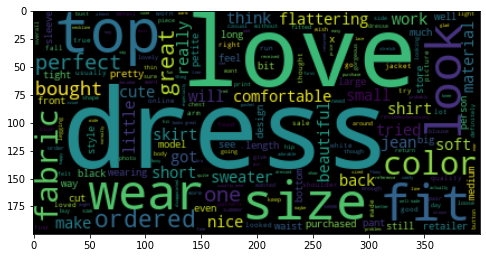

In [17]:
from wordcloud import WordCloud 

visual_rev = WordCloud().generate(' '.join(data['Review Text']))
plt.figure(figsize=(8,8))
plt.imshow(visual_rev, interpolation='bilinear')
plt.show()

# 3.TF-IDF

In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [19]:
tfidf = TfidfVectorizer(max_features=100)
tfidf.fit(data['Review Text'])
tfidf_data = tfidf.transform(data['Review Text'])
tfidf_data

<22641x100 sparse matrix of type '<class 'numpy.float64'>'
	with 486803 stored elements in Compressed Sparse Row format>

In [20]:
tfidf_data = pd.DataFrame(tfidf_data.toarray(), columns=tfidf.get_feature_names())
tfidf_data.head()

,all,also,am,an,and,are,as,at,back,be,...,wear,well,when,which,will,with,work,would,xs,you
0,0.000000,0.0,0.000000,0.0,0.602589,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.000000,0.0,0.000,0.0,0.000000,0.000000,0.000000,0.0,0.0
1,0.000000,0.0,0.148418,0.0,0.133039,0.0,0.0,0.0,0.0,0.136029,...,0.000000,0.000000,0.0,0.000,0.0,0.000000,0.000000,0.307109,0.0,0.0
2,0.000000,0.0,0.000000,0.0,0.163130,0.0,0.0,0.0,0.0,0.111198,...,0.000000,0.000000,0.0,0.152,0.0,0.000000,0.163481,0.000000,0.0,0.0
3,0.000000,0.0,0.000000,0.0,0.142825,0.0,0.0,0.0,0.0,0.000000,...,0.300158,0.000000,0.0,0.000,0.0,0.000000,0.000000,0.000000,0.0,0.0
4,0.228419,0.0,0.000000,0.0,0.082899,0.0,0.0,0.0,0.0,0.000000,...,0.174219,0.217172,0.0,0.000,0.0,0.273455,0.000000,0.000000,0.0,0.0


# 4.Sentiment Analysis

In [21]:
from textblob import TextBlob

In [22]:
# Applying text blob sentiment
def polarity(t):
    a = TextBlob(t).sentiment
    return a[0]

def subjectivity(t):
    a = TextBlob(t).sentiment
    return a[1]

data['polarity'] = data.apply(lambda t: polarity(t['Review Text']), axis=1)
data['subjectivity'] = data.apply(lambda t: subjectivity(t['Review Text']), axis=1)
data.head()

<ipython-input-22-14a09e40fa9f>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['polarity'] = data.apply(lambda t: polarity(t['Review Text']), axis=1)
<ipython-input-22-14a09e40fa9f>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['subjectivity'] = data.apply(lambda t: subjectivity(t['Review Text']), axis=1)


,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,polarity,subjectivity
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates,0.633333,0.933333
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses,0.339583,0.725000
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses,0.073675,0.356294
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants,0.550000,0.625000
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses,0.512891,0.568750


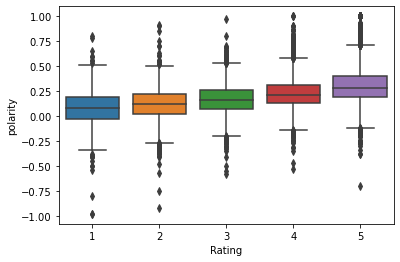

In [23]:
# Polarity and Rating
sns.boxplot(data=data, x='Rating', y='polarity')
plt.show()

In [24]:
data.groupby('Rating').median()[['polarity', 'subjectivity']]

,polarity,subjectivity
Rating,,
1,0.087500,0.529167
2,0.120455,0.528333
3,0.164286,0.529004
4,0.214811,0.542396
5,0.287500,0.570000


# 5. Sentiment Analysis: BoW (Bag-of-Words)

In [25]:
# Apply uni- and bigram vectorizer
class lemmatizer(object):
    def __init__(self):
        self.wnl = WordNetLemmatizer()
    def __call__(self, df):
        return [self.wnl.lemmatize(word) for word in word_tokenize(df)]

vectorizer = CountVectorizer(max_features=60, max_df=0.95, min_df=0.05, ngram_range=(1,2),
                             tokenizer=lemmatizer(), lowercase=True, stop_words='english',
                             token_pattern = r'\w+')

vectorizer.fit(data['Review Text'])
count_vector = vectorizer.transform(data['Review Text'])

bow_data = count_vector.toarray()
bow_data = pd.DataFrame(bow_data, columns=vectorizer.get_feature_names())
bow_data.head()

/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:489: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"
/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:388: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ha', 'le', 'u', 'wa'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '


,!,','','m,'s,(,),",",-,. 'm,...,size,skirt,small,soft,sweater,think,wa,waist,wear,work
0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,1,2,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,2,2,4,1,0,...,1,0,3,0,0,0,3,0,0,1
3,2,0,0,0,1,0,0,5,0,0,...,0,0,0,0,0,0,0,0,1,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [26]:
# Removing meaningless columns
bow_data2 = bow_data.iloc[:,10:]

# Split data
X_train, X_test, y_train, y_test = train_test_split(bow_data,
                                                  data['Rating'],
                                                  stratify=data['Rating'],
                                                  test_size=0.2, random_state=123)

In [27]:
# Create the model
sklearn = AutoSklearnRegressor(time_left_for_this_task=3*60, per_run_time_limit=60, n_jobs=-1)

# Fit the training data
sklearn.fit(X_train, y_train)

# Sprint Statistics
print(sklearn.sprint_statistics())

# Predict the test data
pred_sklearn = sklearn.predict(X_test)
pred_sklearn2 = [round(i) for i in pred_sklearn]

# Compute the RMSE
rmse_sklearn = mean_squared_error(y_test, pred_sklearn2)**0.5
print('RMSE: ' + str(rmse_sklearn))

auto-sklearn results:
  Dataset name: f07f3ecc-4a51-11ec-863b-f40f240498a4
  Metric: r2
  Best validation score: 0.285032
  Number of target algorithm runs: 15
  Number of successful target algorithm runs: 4
  Number of crashed target algorithm runs: 0
  Number of target algorithms that exceeded the time limit: 11
  Number of target algorithms that exceeded the memory limit: 0

RMSE: 0.9949086553556844


In [28]:
# Show the models
print(sklearn.show_models())

[(0.820000, SimpleRegressionPipeline({'data_preprocessor:__choice__': 'feature_type', 'feature_preprocessor:__choice__': 'no_preprocessing', 'regressor:__choice__': 'gradient_boosting', 'data_preprocessor:feature_type:categorical_transformer:categorical_encoding:__choice__': 'one_hot_encoding', 'data_preprocessor:feature_type:categorical_transformer:category_coalescence:__choice__': 'minority_coalescer', 'data_preprocessor:feature_type:numerical_transformer:imputation:strategy': 'mean', 'data_preprocessor:feature_type:numerical_transformer:rescaling:__choice__': 'standardize', 'regressor:gradient_boosting:early_stop': 'train', 'regressor:gradient_boosting:l2_regularization': 0.005746611563553693, 'regressor:gradient_boosting:learning_rate': 0.0913971028976721, 'regressor:gradient_boosting:loss': 'least_squares', 'regressor:gradient_boosting:max_bins': 255, 'regressor:gradient_boosting:max_depth': 'None', 'regressor:gradient_boosting:max_leaf_nodes': 9, 'regressor:gradient_boosting:min_

In [29]:
# Prediction results
print('Confusion Matrix')
print(pd.DataFrame(confusion_matrix(y_test, pred_sklearn2), index=[1,2,3,4,5], columns=[1,2,3,4,5]))

Confusion Matrix
   1  2    3     4     5
1  0  1   71    87     5
2  0  8  127   165    10
3  0  3  182   346    34
4  0  1  144   612   225
5  0  1   90  1231  1186


# 6. Sentiment Analysis: Tf-Idf (Term Frequency — Inverse Document Frequency)

In [30]:
# Creating Tf-Idf
tfidf = TfidfVectorizer(max_features=70)
tfidf.fit(data['Review Text'])
tfidf_data = tfidf.transform(data['Review Text'])

tfidf_data = pd.DataFrame(tfidf_data.toarray(), columns=tfidf.get_feature_names())
tfidf_data.head()

,all,am,an,and,are,as,at,back,be,beautiful,...,up,very,was,wear,well,when,will,with,would,you
0,0.00000,0.000000,0.0,0.602589,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.000000,0.00000,0.0
1,0.00000,0.198925,0.0,0.178312,0.0,0.0,0.0,0.0,0.182321,0.0,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.000000,0.41162,0.0
2,0.00000,0.000000,0.0,0.180878,0.0,0.0,0.0,0.0,0.123296,0.0,...,0.140215,0.117682,0.32552,0.000000,0.000000,0.0,0.0,0.000000,0.00000,0.0
3,0.00000,0.000000,0.0,0.142825,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.000000,0.000000,0.00000,0.300158,0.000000,0.0,0.0,0.000000,0.00000,0.0
4,0.27232,0.000000,0.0,0.098832,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.000000,0.192905,0.00000,0.207703,0.258912,0.0,0.0,0.326012,0.00000,0.0


In [31]:
# Preparing the training and test data
X_train_idf = tfidf_data.loc[X_train.index,:]
X_test_idf = tfidf_data.loc[X_test.index,:]

In [32]:
# Create the model
sklearn_idf = AutoSklearnRegressor(time_left_for_this_task=3*60, per_run_time_limit=60, n_jobs=-1)

# Fit the training data
sklearn_idf.fit(X_train_idf, y_train)

# Sprint Statistics
print(sklearn_idf.sprint_statistics())

# Predict the test data
pred_sklearn_idf = sklearn_idf.predict(X_test_idf)
pred_sklearn_idf2 = [round(i) for i in pred_sklearn_idf]

# Compute the RMSE
rmse_sklearn_idf = mean_squared_error(y_test, pred_sklearn_idf2)**0.5
print('RMSE: ' + str(rmse_sklearn_idf))

auto-sklearn results:
  Dataset name: 9c49cd7e-4a54-11ec-863b-f40f240498a4
  Metric: r2
  Best validation score: 0.043106
  Number of target algorithm runs: 13
  Number of successful target algorithm runs: 2
  Number of crashed target algorithm runs: 0
  Number of target algorithms that exceeded the time limit: 11
  Number of target algorithms that exceeded the memory limit: 0

RMSE: 1.1305782192034521


In [33]:
# Show the models
print(sklearn_idf.show_models())

[(1.000000, SimpleRegressionPipeline({'data_preprocessor:__choice__': 'feature_type', 'feature_preprocessor:__choice__': 'no_preprocessing', 'regressor:__choice__': 'gradient_boosting', 'data_preprocessor:feature_type:categorical_transformer:categorical_encoding:__choice__': 'one_hot_encoding', 'data_preprocessor:feature_type:categorical_transformer:category_coalescence:__choice__': 'minority_coalescer', 'data_preprocessor:feature_type:numerical_transformer:imputation:strategy': 'median', 'data_preprocessor:feature_type:numerical_transformer:rescaling:__choice__': 'robust_scaler', 'regressor:gradient_boosting:early_stop': 'off', 'regressor:gradient_boosting:l2_regularization': 5.997418027353535e-10, 'regressor:gradient_boosting:learning_rate': 0.12286466971783992, 'regressor:gradient_boosting:loss': 'least_squares', 'regressor:gradient_boosting:max_bins': 255, 'regressor:gradient_boosting:max_depth': 'None', 'regressor:gradient_boosting:max_leaf_nodes': 26, 'regressor:gradient_boosting

In [34]:
# Prediction results
print('Confusion Matrix')
pred_sklearn_idf3 = [i if i <= 5 else 5 for i in pred_sklearn_idf2]
print(pd.DataFrame(confusion_matrix(y_test, pred_sklearn_idf3), index=[1,2,3,4,5], columns=[1,2,3,4,5]))

Confusion Matrix
   1  2  3     4  5
1  0  0  0   164  0
2  0  0  0   310  0
3  0  0  0   565  0
4  0  0  0   982  0
5  0  0  0  2508  0
